<a href="https://colab.research.google.com/github/SantoshMahara/Time_Series_ARIMA_SARIMA/blob/main/Time_Series_03_March_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Load the Lib

Load the data

EDA

Stationarity

Seasonal decompose

ACF

PACF

AUTO_ARIMA

Make a Model== ARIMA + SARIMA

In [2]:
import pandas as pd #manipulation and data loading
import numpy as np #numerical python
import matplotlib.pyplot as plt #visualization
import seaborn as sns #advance visualizaiton

from statsmodels.tsa.seasonal import seasonal_decompose #visual representation  of seasonal decompose
from statsmodels.tsa.stattools import acf, pacf #ploting acf and pacf graph
from statsmodels.tsa.arima_model import ARIMA #modeling

In [4]:
#load the data
data=pd.read_csv('/content/sample_data/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [17]:
data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
data['Month']=pd.to_datetime(data['Month'])
data.index=data['Month']

In [16]:
del data['Month']

<Axes: xlabel='Month'>

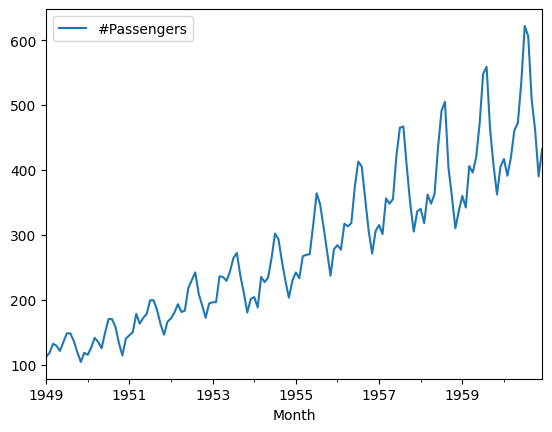

In [18]:
data.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

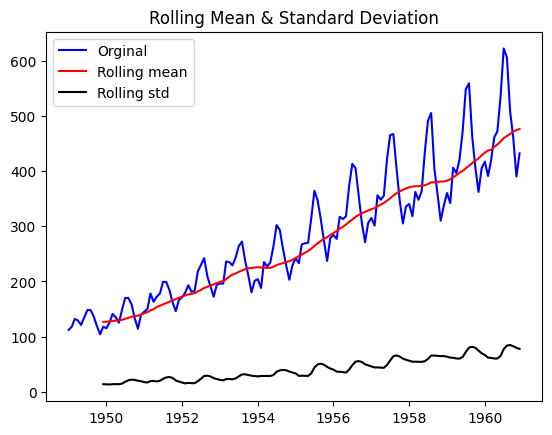

In [19]:
mean_log=data.rolling(window=12).mean()
std_log=data.rolling(window=12).std()

plt.plot(data,color='blue',label='Orginal')
plt.plot(mean_log, color='red',label='Rolling mean')
plt.plot(std_log, color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [20]:
#checking the stationarity usign adfuller test
from statsmodels.tsa.stattools import adfuller

In [22]:
result=adfuller(data['#Passengers'])
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [23]:
p_value=result[1]
p_value

0.991880243437641

In [24]:
#reference purpose
if p_value<=0.05:
  print('Stationarity is Present')
else:
  print('No Stationarity is present')

No Stationarity is present


<Axes: xlabel='Month'>

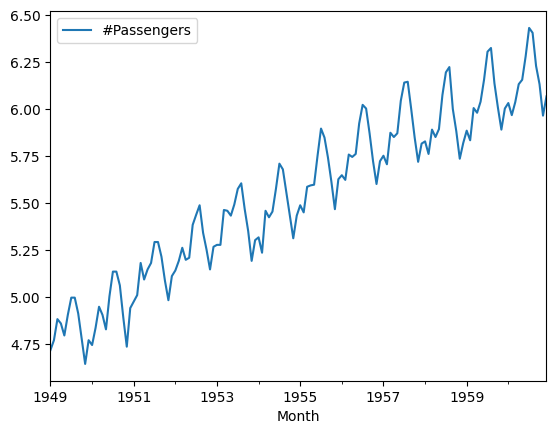

In [26]:
first_log=np.log(data)
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

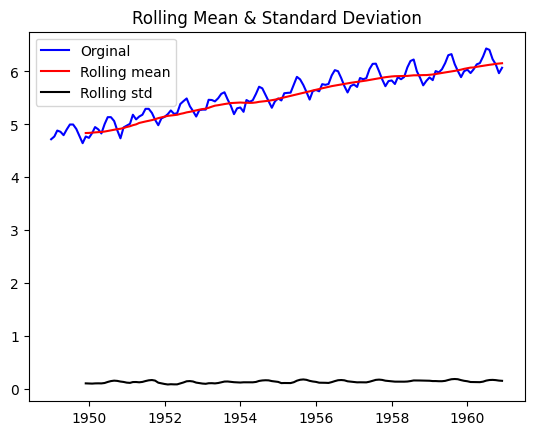

In [27]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Orginal')
plt.plot(mean_log, color='red',label='Rolling mean')
plt.plot(std_log, color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [28]:
result=adfuller(first_log['#Passengers'])
result[1]

0.4223667747703874

In [29]:
result

(-1.7170170891069683,
 0.4223667747703874,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [32]:
new_data=first_log - mean_log
new_data=new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [34]:
result=adfuller(new_data['#Passengers'])
result

(-3.1629079913008833,
 0.022234630001242206,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

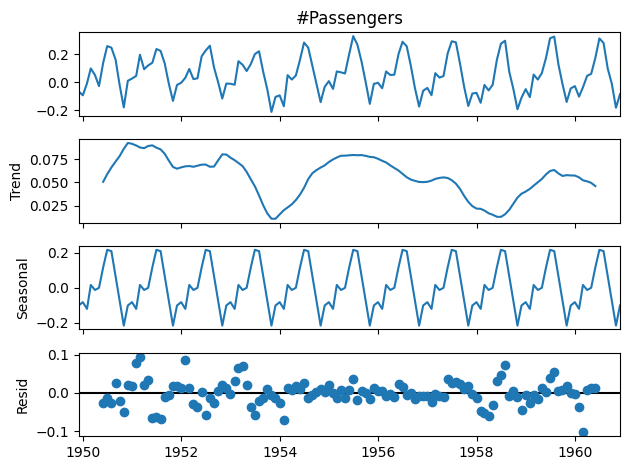

In [37]:
#seasonal decompose
decop=seasonal_decompose(new_data['#Passengers'].dropna())
decop.plot();

In [38]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [40]:
from pmdarima import auto_arima

In [46]:
arima_model=auto_arima(data['#Passengers'],seasonal=True, Trace=True)

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

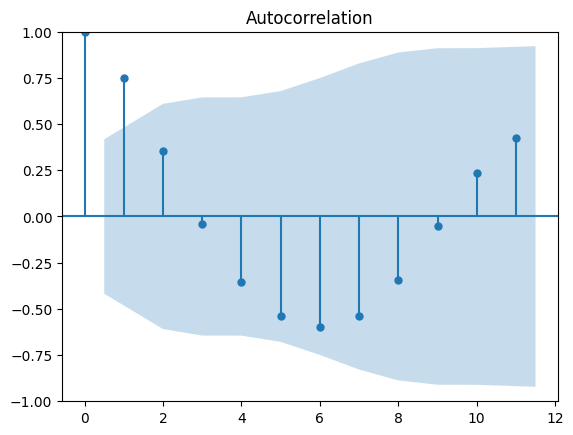

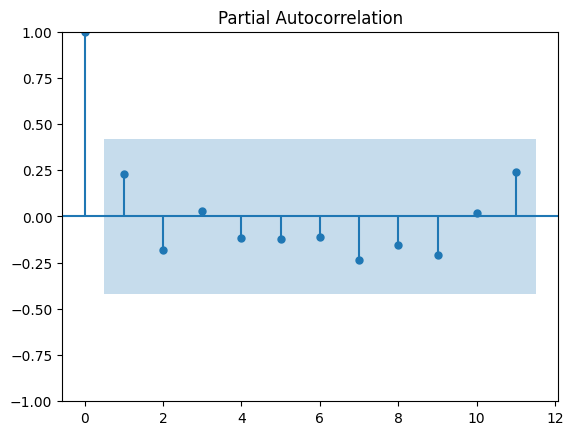

In [44]:
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot)

plot_pacf(pacf_plot);

In [48]:
from statsmodels.tsa.arima.model import ARIMA
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[120:]['#Passengers']
model=ARIMA(train,order=(3,0,2))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 134.726
Date:                Sun, 03 Mar 2024   AIC                           -255.453
Time:                        17:04:18   BIC                           -235.940
Sample:                    12-01-1949   HQIC                          -247.529
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.006      8.958      0.000       0.044       0.069
ar.L1          0.7851      0.151      5.199      0.000       0.489       1.081
ar.L2          0.2854      0.186      1.531      0.126      -0.080       0.651
ar.L3         -0.5319      0.120     -4.440      0.000      -0.767      -0.297
ma.L1          0.1278      0.122      1.043      0.297      -0.112       0.368
ma.L2         -0.7497      0.093     -8.051      0.000      -0.932      -0.567
sigma2         0.0061      0.001      5.414      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.53   Prob(JB):                         0.15
Heteroskedasticity (H):               0.98   Skew:                             0.11
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

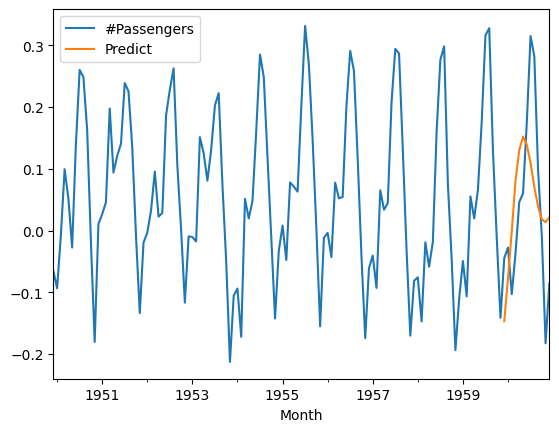

In [49]:
new_data['Predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','Predict']].plot()

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [51]:
model=SARIMAX(train, order=(3,0,2), seasonal_order=(3,0,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Convergenc

In [52]:
new_data['Predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','Predict']].plot

<Axes: xlabel='Month'>

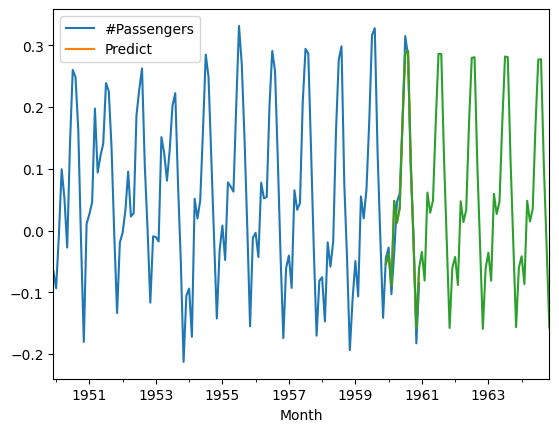

In [53]:
forecast=model.forecast(steps=60)
new_data.plot()
forecast.plot()